## Chapter 1: Setting up Environment

This chapter has you set up a virtual environment. I opted to use the python VENV package rather than conda. 

I also installed matplotlib, numpy, pandas, seaborn, sklearn



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold
%matplotlib inline 

In [7]:
data = datasets.fetch_openml('mnist_784',
                             version=1,
                             return_X_y=True
                             )

pixel_values, targets = data
targets = targets.astype(int)

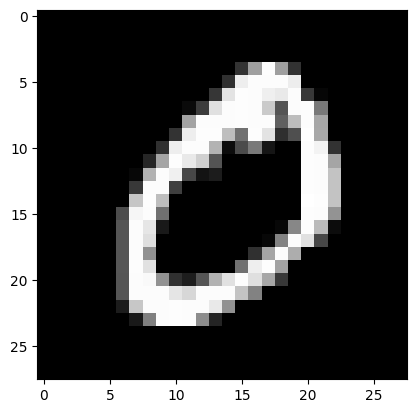

In [24]:
single_image = pixel_values.loc[1,:].to_numpy()
single_image = single_image.reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [26]:
tsne=manifold.TSNE(n_components=2,random_state=42)
transformed_data = tsne.fit_transform(pixel_values.loc[:3000,:])

In [27]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets.loc[:3000])),
                       columns=["x","y","targets"]
                      )

tsne_df.loc[:,"targets"]= tsne_df.targets.astype(int)

In [28]:
tsne_df

,x,y,targets
0,19.884451,-11.932944,5.0
1,57.960007,0.538969,0.0
2,-0.857919,-54.564732,4.0
3,-42.470406,12.949685,1.0
4,-10.344489,-32.795681,9.0
...,...,...,...
2996,52.938328,-2.782877,0.0
2997,-30.818230,-12.593039,9.0
2998,-24.905033,46.314190,1.0
2999,11.774707,-25.204510,5.0


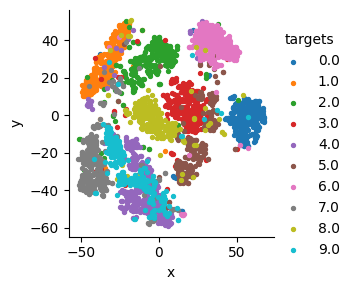

In [31]:
grid = sns.FacetGrid(tsne_df,hue="targets")
grid.map(plt.scatter,"x","y",s=8).add_legend()

This chapter set up the environment and introduced the sklearn package. 

Things that came up to learn more about for myself. 

1) T-NSE or  t-Distributed Stochastic Neighbor Embedding is a dimensionality reduction technique.
2) Consider using clustering to reduce the dimensions in other data